<a href="https://colab.research.google.com/github/JaladiRishitha/LetsGrowMore/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading the Dataset**

In [ ]:

import pandas as pd
import numpy as np
data=pd.read_csv('Iris.csv')
data['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

**Dropping unused Columns**

In [ ]:
dd=data.drop('Id',axis=1)
dd

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Explore the Data**

In [ ]:

dd.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:

dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Data Preprocessing**

In [ ]:
# convert the species column from categorical to numerical data
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
label=LabelEncoder()
dd.iloc[:,-1]=label.fit_transform(dd.iloc[:,-1])
dd

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**Splitting Data Into Input and Target Variables**

In [ ]:


X= dd.values[:,0:4]
Y=dd.values[:,-1]
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

**Splitting Training and Testing Data**

In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=10)
X_train.shape


(120, 4)

In [ ]:
X_test.shape
     

(30, 4)

**Model Creation (Decission Tree)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

**Comparing the Predicted Output with Actual Output**

In [ ]:
prediction=model.predict(X_test)
prediction

array([1., 2., 0., 1., 0., 1., 2., 1., 0., 1., 1., 2., 1., 0., 0., 2., 1.,
       0., 0., 0., 2., 2., 2., 0., 1., 0., 1., 1., 1., 2.])

**Measuring the Accuracy of the Model**

In [ ]:

from sklearn.metrics import accuracy_score
print(accuracy_score(prediction,Y_test)*100)

96.66666666666667


**Confusion Matrix**

In [ ]:

# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(prediction,Y_test)

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  7]])

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(prediction,Y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.92      1.00      0.96        12
         2.0       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



**Decission Tree Model Visualization**

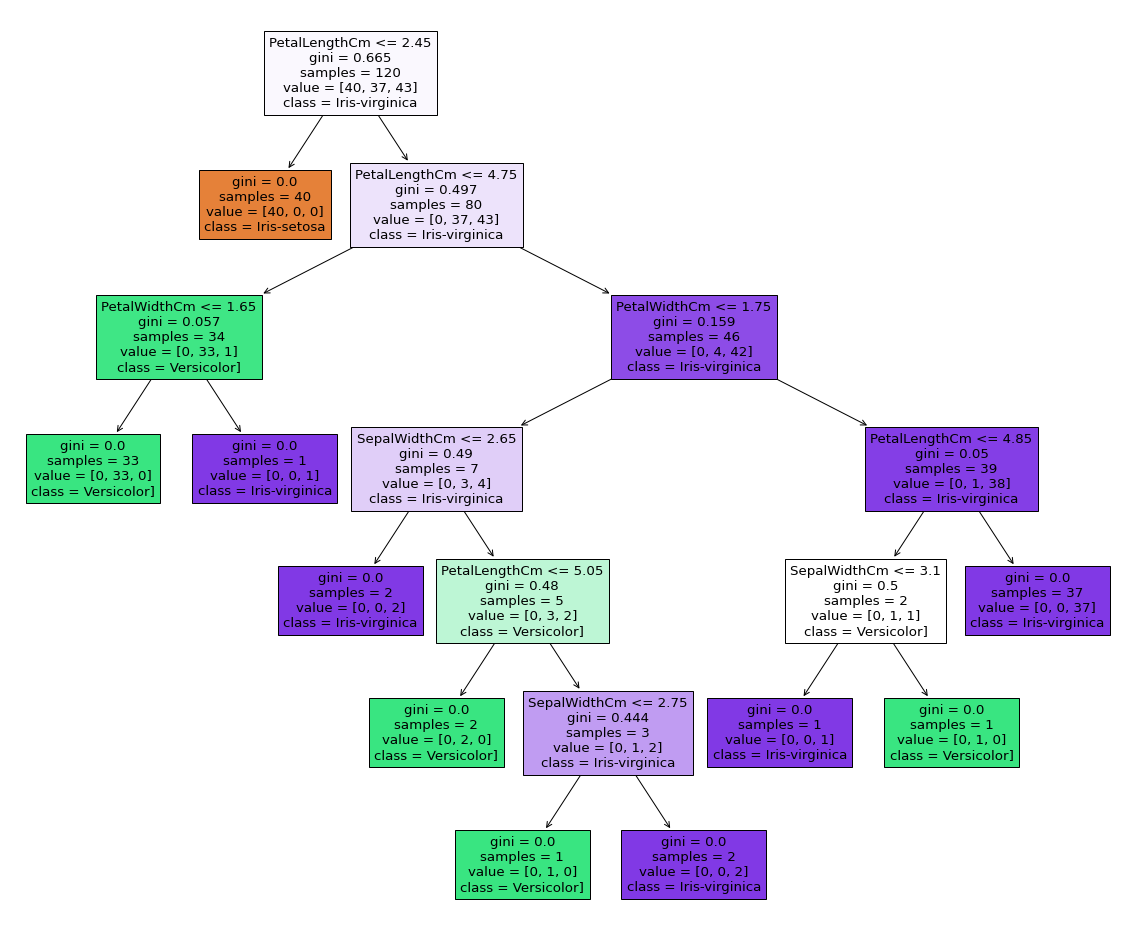

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
plt.figure(figsize=(20,17))
f_n=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
s_n=['Iris-setosa','Versicolor]','Iris-virginica']
model_viz=tree.plot_tree(model,feature_names=f_n, class_names=s_n,filled=True)
